In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Regression model
from sklearn.linear_model import LogisticRegression
#Supervised Classsification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#fitting 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler


In [2]:
data=pd.read_csv("spine_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [4]:
#to check what class_att column contains
data.Class_att.unique()

array(['Abnormal', 'Normal'], dtype=object)

In [5]:
data=data.drop('Unnamed: 13',axis=1)

In [6]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [7]:
data.rename(columns={
    "Col1":"pelvic_incidence",
    "Col2":"pelvic tilt",
    "Col3":"lumbar_lordosis_angle",
    "Col4":"sacral_slope",
    "Col5":"pelvic_radius",
    "Col6":"degree_spondylolisthesis",
    "Col7":"pelvic_slope",
    "Col8":"Direct_tilt",
    "Col9":"thoracic_slope",
    "Col10":"cervical_tilt",
    "Col11":"sacrum_angle",
    "Col12":"scoliosis_slope",
    "Class_att":"variable"
},inplace=True)

<AxesSubplot:>

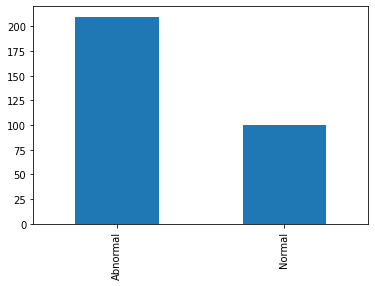

In [8]:
data["variable"].value_counts().sort_index().plot.bar()

In [9]:
#Changing categorical value to 
# data.variable=data.variable.astype("category").cat.codes
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder().fit_transform(data['variable'])
data.drop("variable",axis=1,inplace=True)
data["Condition"]=label

In [10]:
data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Condition
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0


In [11]:
data=data.drop(['pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope'],axis=1)

In [12]:
y=data.Condition
X=data.drop("Condition",axis=1)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
#Training models
from sklearn.metrics import accuracy_score
acc_list=[]
model_list=[]
for model in [LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,SVC]:
    classifier=model().fit(X_train,y_train)
    %time predictions=classifier.predict(X_test)
    model_list.append((model).__name__)
    acc_list.append(accuracy_score(predictions,y_test))

CPU times: total: 0 ns
Wall time: 1.04 ms
CPU times: total: 0 ns
Wall time: 997 µs
CPU times: total: 15.6 ms
Wall time: 8.94 ms
CPU times: total: 0 ns
Wall time: 997 µs
CPU times: total: 0 ns
Wall time: 1.99 ms


In [15]:
results=pd.DataFrame({ 'ML Model': model_list,    
    'Test Accuracy': acc_list})
results

,ML Model,Test Accuracy
0,LogisticRegression,0.881720
1,DecisionTreeClassifier,0.827957
2,RandomForestClassifier,0.827957
3,GradientBoostingClassifier,0.817204
4,SVC,0.827957


In [16]:
results.sort_values(by=['Test Accuracy'], ascending=False)

,ML Model,Test Accuracy
0,LogisticRegression,0.881720
1,DecisionTreeClassifier,0.827957
2,RandomForestClassifier,0.827957
4,SVC,0.827957
3,GradientBoostingClassifier,0.817204


(0.5, 1.0)

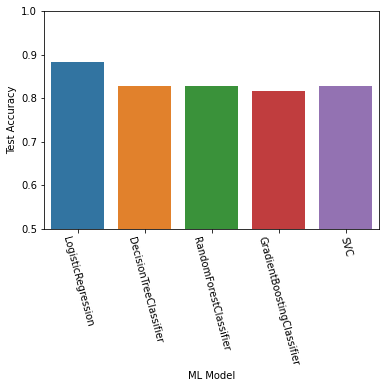

In [17]:
#displaying results in bargraph
sns.barplot(x=results["ML Model"],y=results["Test Accuracy"],data=results)
plt.xticks(rotation=-75)
plt.ylim(0.5,1)

In [18]:
#Unsupervised classification 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
km=KMeans(n_clusters=2,random_state=42)
km.fit_predict(X_train)
score=silhouette_score(X_train,km.labels_,metric='euclidean')
print('Silhouette_score:%.3f'%score)

Silhouette_score:0.479


In [19]:
pip install yellowbrick

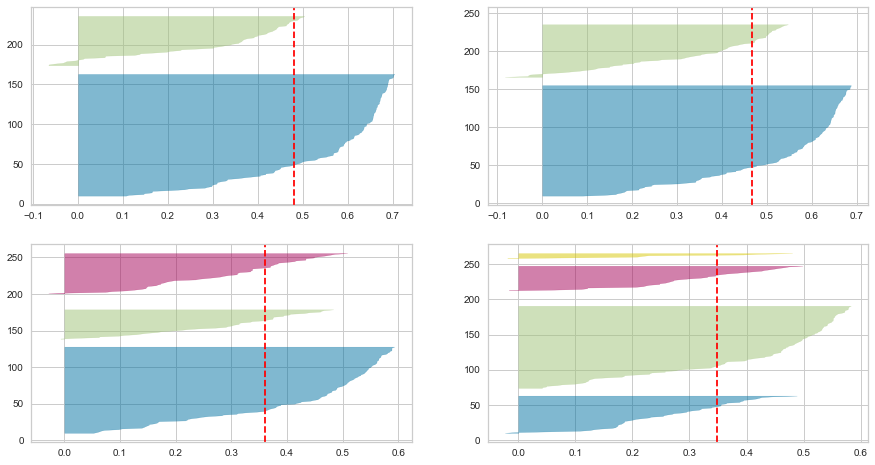

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer
fig,ax=plt.subplots(2,2,figsize=(15,8))
for i in [2,3,4,5]:
    #Kmeans instances for different clusters
    km=KMeans(n_clusters=i,random_state=42)
    q,mod=divmod(i,2)
    #Create SilhoutteVisualizer with KMeans instance
    visualizer=SilhouetteVisualizer(km,colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(X_train)